# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [3]:
df

{'road_event_feed_info': {'publisher': 'National Park Service',
  'version': '4.1',
  'update_date': '2024-01-16T16:49:30.901071Z',
  'update_frequency': 900,
  'contact_name': 'National Park Service',
  'contact_email': 'asknps@nps.gov',
  'data_sources': [{'data_source_id': '02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2',
    'organization_name': 'Crater Lake National Park',
    'update_date': '2024-02-01T01:07:37.430224Z',
    'contact_name': 'Crater Lake National Park',
    'contact_email': 'CRLA_Superintendent@nps.gov'},
   {'data_source_id': '0c9a542c-a992-42be-2ddc-08d4c7ad36e2',
    'organization_name': 'Shenandoah National Park',
    'update_date': '2023-11-30T18:59:29.909161Z',
    'contact_name': 'Shenandoah National Park',
    'contact_email': 'SHEN_Superintendent@nps.gov'},
   {'data_source_id': '16e33ae7-e71f-45ce-2e37-08d4c7ad36e2',
    'organization_name': 'Yosemite National Park',
    'update_date': '2023-07-09T18:07:22.389219Z',
    'contact_name': 'Yosemite National Park',
  

In [4]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [5]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [6]:
today_string

'2024-03-21'

In [7]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(18, 86, 20)

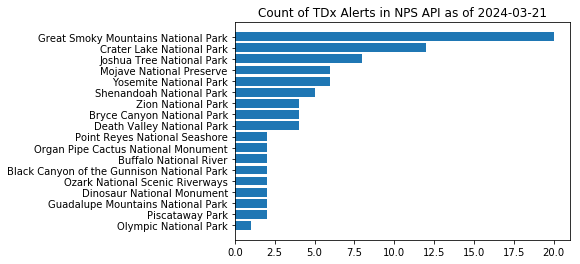

In [8]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


In [9]:
#import matplotlib.ticker as ticker
#import seaborn as sns 

#plt.style.use('seaborn')
#sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


#bar_labels = park_df['park']

#fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
#title = "Count of TDx Alerts in NPS API as of " + today_string
#ax.set_title(title, fontsize=34)

#bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
#ax.tick_params(axis='x', which='major', labelsize=26)
#ax.tick_params(axis='y', which='major', labelsize=26)

#plt.xticks(range(1,max(park_df['number of alerts'])+1))

#for bar in bars:
#    width = bar.get_width() #Previously we got the height
#    label = '{:,}'.format(width)
#    label_y_pos = bar.get_y() + bar.get_height() / 2
#    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(18)



#plt.show()

In [10]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []
id_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
    print("Alert ID: ", x['properties']['core_details']['data_source_id'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
    id_list.append(x['properties']['core_details']['data_source_id'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed
Alert ID:  02e0312b-cbd4-40bb-2c4e-08d4c7ad36e2

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'P

In [11]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
    "alert_id": id_list
#    "event end date": end_date_list
})
df_update.head

<bound method NDFrame.head of           date                                        park  \
0   2024-03-21                   Crater Lake National Park   
1   2024-03-21                   Crater Lake National Park   
2   2024-03-21                   Crater Lake National Park   
3   2024-03-21                   Crater Lake National Park   
4   2024-03-21                   Crater Lake National Park   
5   2024-03-21                   Crater Lake National Park   
6   2024-03-21                   Crater Lake National Park   
7   2024-03-21                   Crater Lake National Park   
8   2024-03-21                   Crater Lake National Park   
9   2024-03-21                   Crater Lake National Park   
10  2024-03-21                   Crater Lake National Park   
11  2024-03-21                   Crater Lake National Park   
12  2024-03-21                    Shenandoah National Park   
13  2024-03-21                    Shenandoah National Park   
14  2024-03-21                    Shenan

In [12]:
path = "Park Unit Scraping Information.csv"
regionlookup = pd.read_csv(path, encoding='latin-1')
regionlookup.head()

,Park Name,Park Full Name,Type of Unit,State,Reg,Alpha,Unit
0,Abraham Lincoln Birthplace,Abraham Lincoln Birthplace National Historical...,National Historical Park,KY,SER,ABLI,1.0
1,Acadia,Acadia National Park,National Park,ME,NER,ACAD,1.0
2,Adams,Adams National Historical Park,National Historical Park,MA,NER,ADAM,1.0
3,African Burial Ground,African Burial Ground National Monument,National Monument,NY,NER,AFBG,1.0
4,Agate Fossil Beds,Agate Fossil Beds National Monument,National Monument,NE,MWR,AGFO,1.0


In [13]:
regionlookup.rename(columns={'Park Full Name':"park", "Reg":"region","Alpha":"alpha"}, inplace = True)
region_subset = regionlookup[['park', 'region', 'alpha', "State"]]
region_subset.head

<bound method NDFrame.head of                                                   park region alpha  \
0    Abraham Lincoln Birthplace National Historical...    SER  ABLI   
1                                 Acadia National Park    NER  ACAD   
2                       Adams National Historical Park    NER  ADAM   
3              African Burial Ground National Monument    NER  AFBG   
4                  Agate Fossil Beds National Monument    MWR  AGFO   
5                                   Alagnak Wild River    AKR  ALAG   
6            Alibates Flint Quarries National Monument    IMR  ALFL   
7                  Ala Kahakai National Historic Trail     PW  ALKA   
8    Allegheny Portage Railroad National Historic Site    NER  ALPO   
9                     Amistad National Recreation Area    IMR  AMIS   
10                              American Memorial Park     PW  AMME   
11                Andersonville National Historic Site    SER  ANDE   
12            Aniakchak National Monument and P

In [14]:
merged_df = pd.merge(df_update, region_subset, on="park", how="inner")
merged_df.head

<bound method NDFrame.head of           date                                        park  \
0   2024-03-21                   Crater Lake National Park   
1   2024-03-21                   Crater Lake National Park   
2   2024-03-21                   Crater Lake National Park   
3   2024-03-21                   Crater Lake National Park   
4   2024-03-21                   Crater Lake National Park   
5   2024-03-21                   Crater Lake National Park   
6   2024-03-21                   Crater Lake National Park   
7   2024-03-21                   Crater Lake National Park   
8   2024-03-21                   Crater Lake National Park   
9   2024-03-21                   Crater Lake National Park   
10  2024-03-21                   Crater Lake National Park   
11  2024-03-21                   Crater Lake National Park   
12  2024-03-21                    Shenandoah National Park   
13  2024-03-21                    Shenandoah National Park   
14  2024-03-21                    Shenan

In [15]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [16]:
df_update = pd.concat([merged_df, df_old_update])
df_update.head

<bound method NDFrame.head of           date                                        park  \
0   2024-03-21                   Crater Lake National Park   
1   2024-03-21                   Crater Lake National Park   
2   2024-03-21                   Crater Lake National Park   
3   2024-03-21                   Crater Lake National Park   
4   2024-03-21                   Crater Lake National Park   
5   2024-03-21                   Crater Lake National Park   
6   2024-03-21                   Crater Lake National Park   
7   2024-03-21                   Crater Lake National Park   
8   2024-03-21                   Crater Lake National Park   
9   2024-03-21                   Crater Lake National Park   
10  2024-03-21                   Crater Lake National Park   
11  2024-03-21                   Crater Lake National Park   
12  2024-03-21                    Shenandoah National Park   
13  2024-03-21                    Shenandoah National Park   
14  2024-03-21                    Shenan

In [17]:
df_update.shape

(169, 12)

In [18]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'alert_id', 'region', 'alpha',
       'State'],
      dtype='object')

In [19]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,alert_id,region,alpha,State
0,Olympic National Park,2,2,2,2,2,2,2,2,2,2,2
1,Black Canyon of the Gunnison National Park,4,4,4,4,4,4,4,4,4,4,4
2,Point Reyes National Seashore,4,4,4,4,4,4,4,4,4,4,4
3,Buffalo National River,4,4,4,4,4,4,4,4,4,4,4
4,Piscataway Park,4,4,4,4,4,4,4,4,4,4,4
5,Ozark National Scenic Riverways,4,4,4,4,4,4,4,4,4,4,4
6,Dinosaur National Monument,4,4,4,4,4,4,4,4,4,4,4
7,Organ Pipe Cactus National Monument,4,4,4,4,4,4,4,4,4,4,4
8,Guadalupe Mountains National Park,4,4,4,4,4,4,4,4,4,4,4
9,Joshua Tree National Park,8,8,8,8,8,8,8,8,8,8,8


In [20]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


In [21]:
#import matplotlib.ticker as ticker
#import seaborn as sns 

#plt.style.use('seaborn')
#sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


#bar_labels = df_update_agg['park']

#fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
#title = "Count of TDx Alerts in NPS API as of " + today_string
#ax.set_title(title, fontsize=34)

#bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
#ax.tick_params(axis='x', which='major', labelsize=26)
#ax.tick_params(axis='y', which='major', labelsize=26)

#plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

#for bar in bars:
#    width = bar.get_width() #Previously we got the height
#    label = '{:,}'.format(width)
#    label_y_pos = bar.get_y() + bar.get_height() / 2
#    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(18)



#plt.show()

In [22]:
df_update.shape, merged_df.shape

((169, 12), (86, 12))

In [23]:
null_region_count = merged_df['region'].isnull().sum()
null_region_count

0

In [24]:
if null_region_count == 0:
    merged_df.to_csv("./TDx_tracker.csv", index=False)
else:
    null_region_rows = joined[joined['region'].isnull()]
    print("Rows with a null Region column:")
    print(null_region_rows)